In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\IOT Datasets\Stress\SaYoPillow.csv")

In [3]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
df.shape

(630, 9)

In [5]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


Stress Detection during sleep

In [6]:
df.isnull().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [7]:
df.duplicated().any()

False

<Axes: >

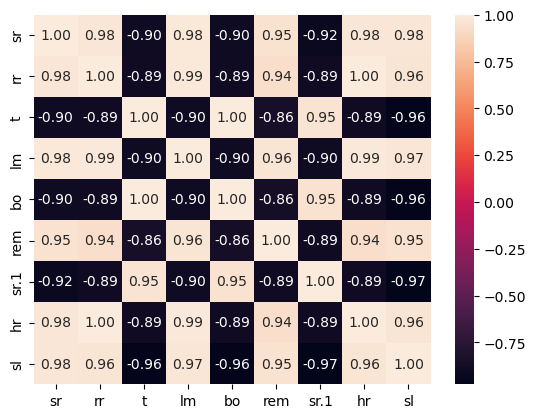

In [8]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

Since data is highly correlated we compute feature scores for the dataset

In [9]:
from sklearn.decomposition import PCA

In [10]:
p=PCA()

In [11]:
p.fit(df)

PCA()

In [12]:
p.explained_variance_ratio_

array([9.68784821e-01, 1.57173590e-02, 8.28279945e-03, 6.29049879e-03,
       7.82583589e-04, 1.11281758e-04, 3.03536393e-05, 3.02347502e-07,
       7.38881307e-33])

In [13]:
feature_df=pd.DataFrame({'Features':df.columns,'Importance':p.explained_variance_ratio_}).sort_values(by='Importance',ascending=False)

<Axes: >

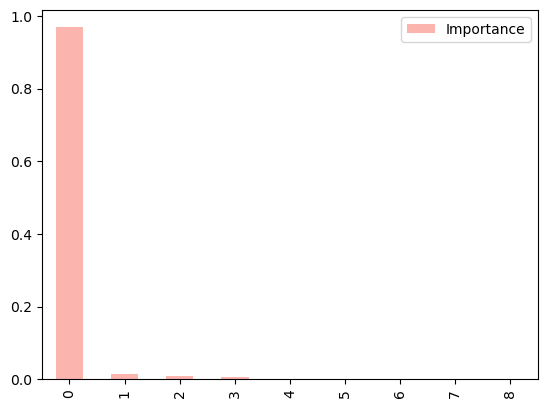

In [14]:
feature_df.plot(kind='bar',cmap='Pastel1')

In [15]:
from sklearn.feature_selection import SelectKBest,f_classif

In [16]:
X=df.drop(columns='sl')
y=df['sl']

In [17]:
k_best=SelectKBest(score_func=f_classif,k=X.shape[1])
k_best.fit(X,y)

SelectKBest(k=8)

In [18]:
scores=k_best.scores_

In [19]:
feature_df=pd.DataFrame({'Features':X.columns,'Scores':k_best.scores_})

In [20]:
feature_df

,Features,Scores
0,sr,4357.579640
1,rr,3137.303150
2,t,2338.935724
3,lm,3057.216610
4,bo,2305.221716
5,rem,2110.257617
6,sr.1,3937.007874
7,hr,3137.303150


<Axes: >

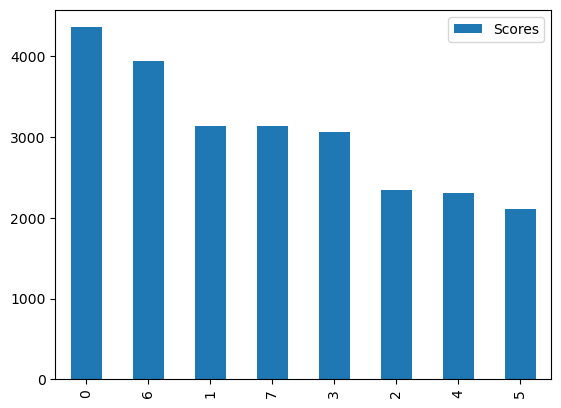

In [21]:
feature_df.sort_values(by='Scores',ascending=False).plot(kind='bar')

<Axes: xlabel='sr', ylabel='sr.1'>

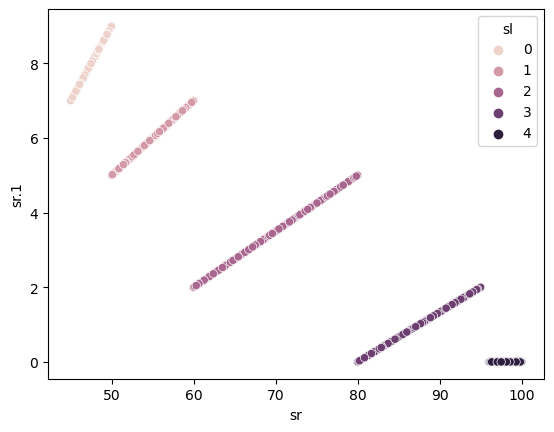

In [22]:
sns.scatterplot(x='sr',y='sr.1',data=df,hue='sl')

In [23]:
new_df=df[['sr','bo','sl']]

<Axes: >

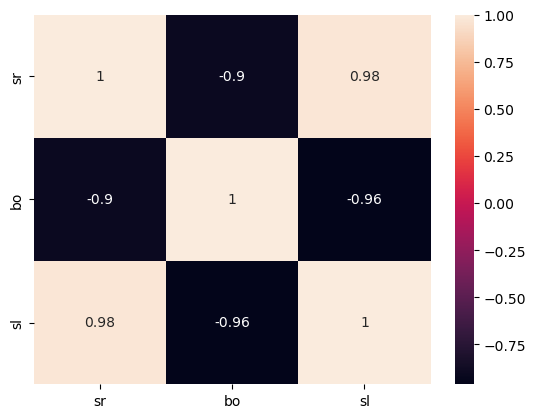

In [24]:
sns.heatmap(new_df.corr(),annot=True)

<Axes: xlabel='sr', ylabel='bo'>

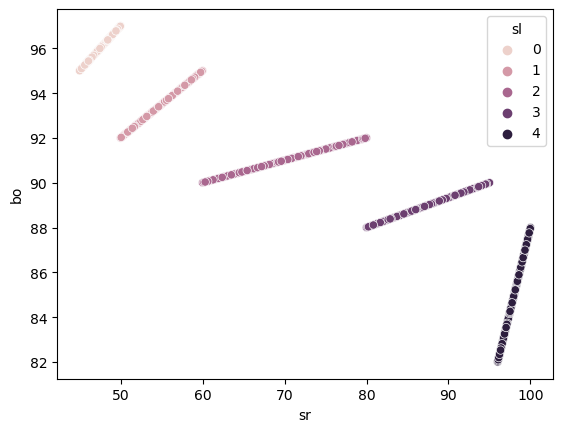

In [25]:
sns.scatterplot(x='sr',y='bo',data=new_df,hue='sl')

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X=new_df.drop(columns='sl')
y=new_df['sl']

In [28]:
s=StandardScaler()

<Axes: xlabel='sl'>

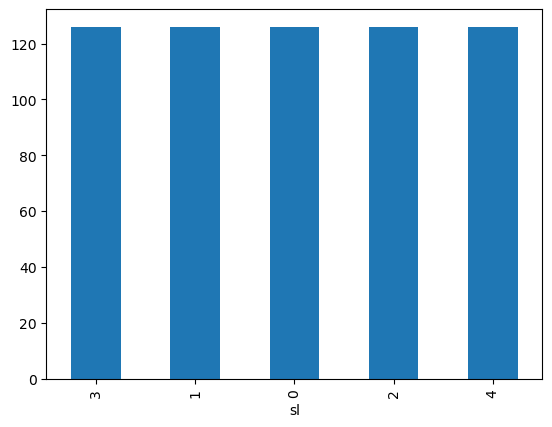

In [29]:
y.value_counts().plot(kind='bar')

In [30]:
y.value_counts()

sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [31]:
X=s.fit_transform(X)

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
n=MLPClassifier(hidden_layer_sizes=(64,128,256),activation='relu',solver='adam')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_tes=train_test_split(X,y,test_size=0.2)

In [36]:
n

MLPClassifier(hidden_layer_sizes=(64, 128, 256))

In [37]:
n.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 128, 256))

In [38]:
y_pred=n.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,precision_recall_curve,confusion_matrix,ConfusionMatrixDisplay

In [40]:
a=accuracy_score(y_tes,y_pred)

In [41]:
p=precision_score(y_tes,y_pred,average='micro')

In [42]:
r=recall_score(y_tes,y_pred,average='micro')

In [43]:
confusion_matrix(y_tes,y_pred)

array([[23,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0],
       [ 0,  0, 20,  0,  0],
       [ 0,  0,  0, 21,  0],
       [ 0,  0,  0,  0, 27]], dtype=int64)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

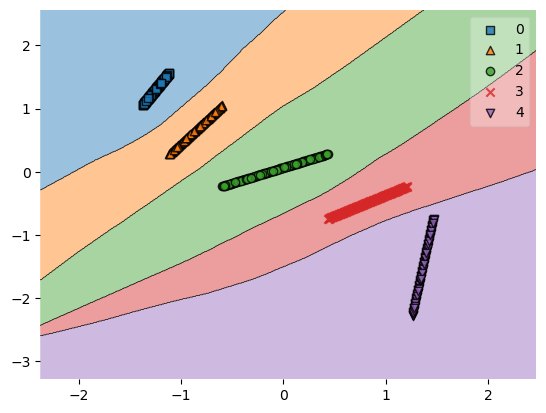

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,np.array(y),n)

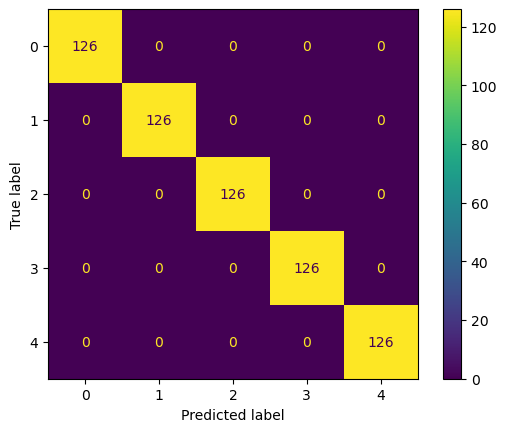

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y,n.predict(X)),display_labels=n.classes_).plot()

In [46]:
import mlflow
mlflow.set_experiment('Stress vs Sleep')
with mlflow.start_run():
    mlflow.sklearn.log_model(sk_model=n,artifact_path='ANN',registered_model_name='SleepvsStress')

C:\Users\ASUS\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'SleepvsStress' already exists. Creating a new version of this model...
Created version '2' of model 'SleepvsStress'.
